# RandomForest with trees of varying depth

RandomForest with varying depth of base classifiers, applied to a classic dataset on thyroid function.

In [1]:
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
plt.style.use("lecture.mplstyle")
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
import pandas as pd
import time

Two imports of note here: pandas, a library to handle data in tabular form, and seaborn, a library for nice looking statistical plots.

## Thyroid dataset

In [2]:
# fetch data from openml.org
# see https://www.openml.org/d/31
from sklearn.datasets import fetch_openml
data = fetch_openml('thyroid-ann', cache=True)
print(data.DESCR)
X, y = data["data"], data["target"]


This directory contains Thyroid datasets. &quot;ann-train.data&quot; contains 3772 
learning examples and &quot;ann-test.data&quot; contains 3428 testing examples. I have 
obtained this data from Daimler-Benz. This are the informations I have got 
together with the dataset:

-------------------------------------------------------------------------------
1. Data setp summary

Number of attributes: 21 (15 attributes are binary,
      6 attributes are continuous)
Number of classes: 3
Number of learning examples: 3772
Number of testing examples: 3428
Data set is availbale on ASCII-file

2. Description

The problem is to determine whether a patient referred to the clinic is
hypothyroid. Therefore three classes are built: normal (not hypothyroid),
hyperfunction and subnormal functioning. Because 92 percent of the patients
are not hyperthyroid a good classifier must be significant better than 92%.

Note

These are the datas Quinlans used in the case study of his article
&quot;Simplifying Deci

/home/henning/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Let's have a look at some basic stats.

In [3]:
print("{} samples with {} features".format(X.shape[0],X.shape[1]))
print("class '1': {}".format(sum(y=='1')))
print("class '2': {}".format(sum(y=='2')))
print("class '3': {}".format(sum(y=='3')))

3772 samples with 21 features
class '1': 93
class '2': 191
class '3': 3488


It's always good to look at the size of the data set and at the class balance. Here we see that the majority has a good credit risk. Let's have a peak at a single data point:

In [4]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,0.73,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00060,0.015,0.120,0.082,0.146
1,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00025,0.030,0.143,0.133,0.108
2,0.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00190,0.024,0.102,0.131,0.078
3,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00090,0.017,0.077,0.090,0.085
4,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00025,0.026,0.139,0.090,0.153


We shuffle the data set and split off a training set. 

In [5]:
X, y = sklearn.utils.shuffle(X,y)

## run RandomForest

We train random forest with increasing numbers of trees in the ensemble, where we restrict the depths of the decision trees to different levels.

In [6]:

def get_errors(classifier,X,y,train_size):
    X_train,X_test=X[:train_size],X[train_size:]
    y_train,y_test=y[:train_size],y[train_size:]
    classifier.fit(X_train,y_train)
    train_err=zero_one_loss(y_train,classifier.predict(X_train))
    test_err=zero_one_loss(y_test,classifier.predict(X_test))
    return train_err,test_err

train_size=2772
result_table=[]
repeats=100
numbers_of_estimators=range(10,101,10)
start=time.time()
for n_estimators in numbers_of_estimators:
    for r in range(repeats):

        rf=RandomForestClassifier(n_estimators=n_estimators,max_depth=2)
        train_err,test_err = get_errors(rf,X,y,train_size)
        result_table.append(['max depth 2',r+1,n_estimators,train_err,test_err])

        rf=RandomForestClassifier(n_estimators=n_estimators,max_depth=4)
        train_err,test_err = get_errors(rf,X,y,train_size)
        result_table.append(['max depth 4',r+1,n_estimators,train_err,test_err])

        rf=RandomForestClassifier(n_estimators=n_estimators,max_depth=6)
        train_err,test_err = get_errors(rf,X,y,train_size)
        result_table.append(['max depth 6',r+1,n_estimators,train_err,test_err])

        rf=RandomForestClassifier(n_estimators=n_estimators)
        train_err,test_err = get_errors(rf,X,y,train_size)
        result_table.append(['fully grown',r+1,n_estimators,train_err,test_err])

result=pd.DataFrame(result_table,columns=['tree depth','repeat_num','number of trees','train error','test error'])
print("running time: {:.2f}".format(time.time()-start))

running time: 528.10


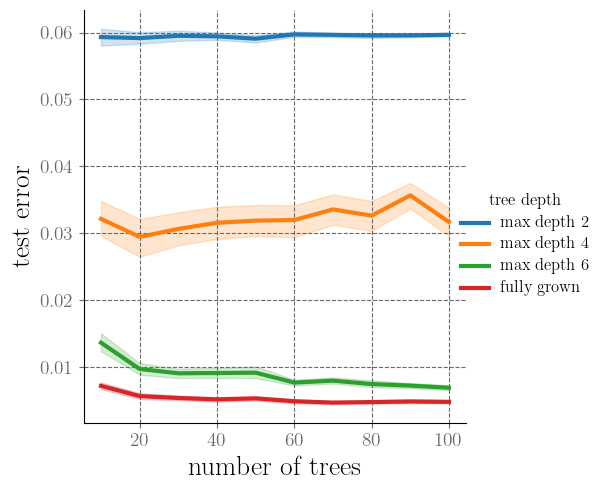

In [7]:

import seaborn as sns
g=sns.relplot(x="number of trees",y="test error",kind="line",data=result,hue='tree depth')
plt.setp(g._legend.get_texts(), fontsize='12') # for legend text
plt.setp(g._legend.get_title(), fontsize='12') # for legend title
plt.savefig("rf_depths.png",dpi=300,bbox_inches='tight',pad_inches=0.1)

The plot is as expected: Fully grown trees are better, more trees are better. 

Let's also look at the training error.

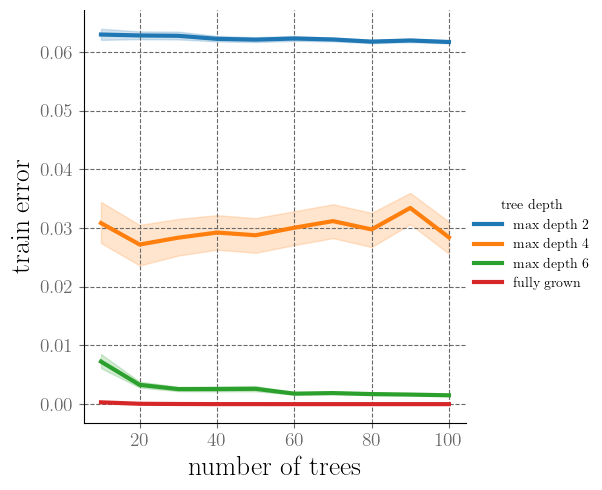

In [8]:
sns.relplot(x="number of trees",y="train error",kind="line",data=result,hue='tree depth')

Here's one reason why depth restricted trees yield inferior results: the resulting majority classifier is still underfitting.